# **Importing the required libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# **Loading the dataset on colab**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Crop Production data.csv')

# **Displaying the first 10 rows of the dataset**

In [4]:
df.head(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.0
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.0,169.0


# **Info of the dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


# **Finding the mean of the production**

In [6]:
mean_production = df['Production'].mean()

In [7]:
mean_production

582503.4422509808

# **Filling the null values with the mean of production**

In [8]:
df['Production'] = df['Production'].fillna(value = mean_production)

# **Info after filling the null values**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     246091 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


# **Countplot of the season**

<Axes: xlabel='Season', ylabel='count'>

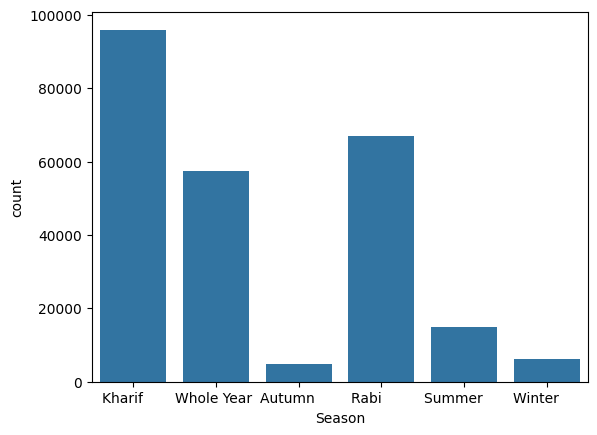

In [10]:
sns.countplot(x = 'Season', data = df)

# **values grouped by Season and displayed on the horizontal bar chart**

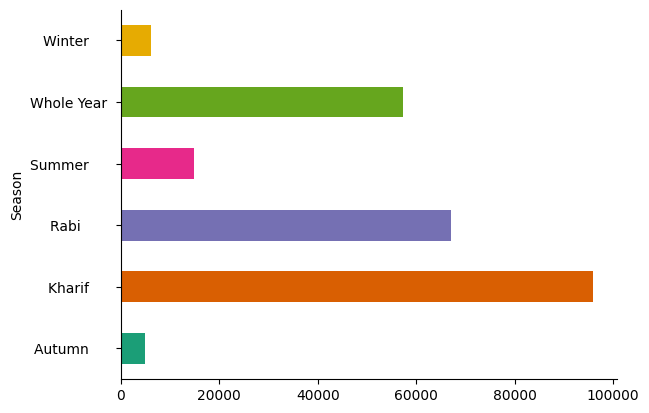

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Season').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Plotting the series between Crop year and area**

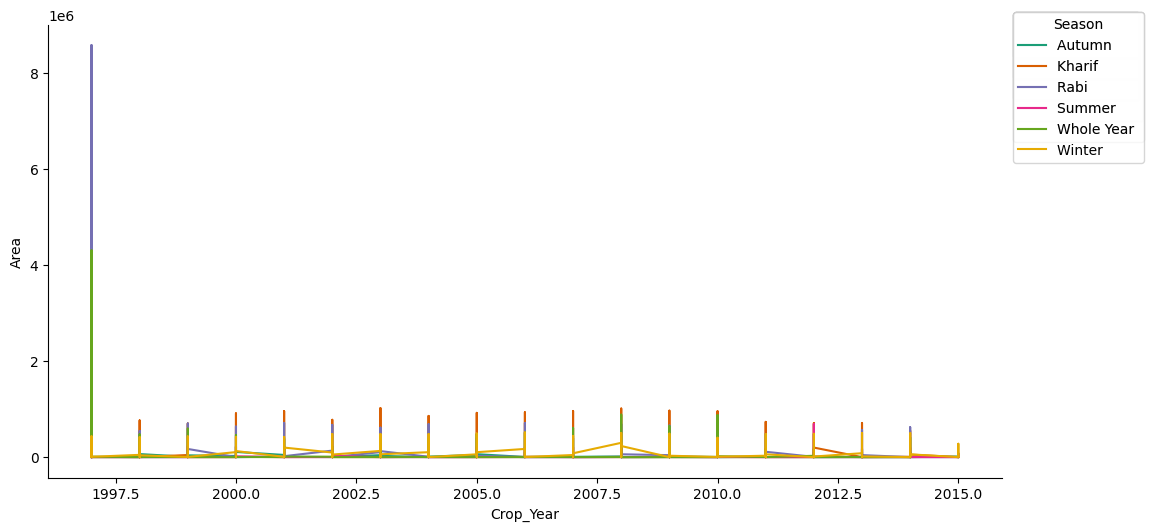

In [12]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Crop_Year']
  ys = series['Area']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Crop_Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Season')):
  _plot_series(series, series_name, i)
  fig.legend(title='Season', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Crop_Year')
_ = plt.ylabel('Area')

# **Plot of area**

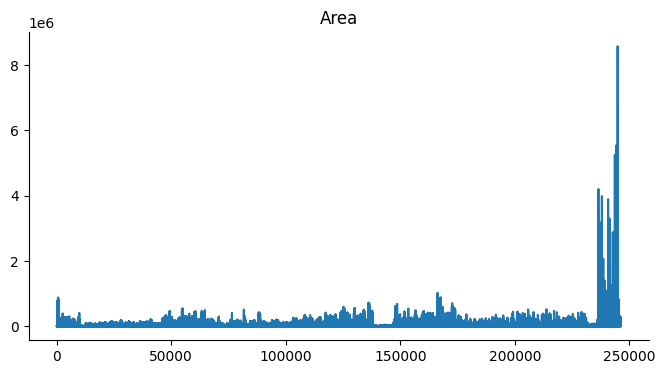

In [13]:
df['Area'].plot(kind='line', figsize=(8, 4), title='Area')
plt.gca().spines[['top', 'right']].set_visible(False)

In [14]:
df.head(15)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.0
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.0,169.0


# **Sum of production**

In [15]:
print("Total Production:", df.Production.sum())

Total Production: 143348854606.9862


# **Total sum of area available**

In [16]:
print("Total Area:", df.Area.sum())

Total Area: 2953786189.17


In [17]:
df.shape

(246091, 7)

# **Count of districts**

In [18]:
df['District_Name'].value_counts()

District_Name
BIJAPUR      945
TUMKUR       936
BELGAUM      925
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
KHUNTI         6
RAMGARH        6
NAMSAI         1
MUMBAI         1
Name: count, Length: 646, dtype: int64

# **Value counts with respect to how many times it is mention in the table according to the seasons in which crop production is done**

In [19]:
df['State_Name'].value_counts()

State_Name
Uttar Pradesh                  33306
Madhya Pradesh                 22943
Karnataka                      21122
Bihar                          18885
Assam                          14628
Odisha                         13575
Tamil Nadu                     13547
Maharashtra                    12628
Rajasthan                      12514
Chhattisgarh                   10709
Andhra Pradesh                  9628
West Bengal                     9613
Gujarat                         8436
Haryana                         5875
Telangana                       5649
Uttarakhand                     4896
Kerala                          4261
Nagaland                        3906
Punjab                          3173
Meghalaya                       2867
Arunachal Pradesh               2546
Himachal Pradesh                2494
Jammu and Kashmir               1634
Tripura                         1412
Manipur                         1267
Jharkhand                       1266
Mizoram                    

#**Count of values per season**

In [20]:
df['Season'].value_counts()

Season
Kharif         95951
Rabi           66987
Whole Year     57305
Summer         14841
Winter          6058
Autumn          4949
Name: count, dtype: int64

#**Finding the dummy values for the categorical variables**

In [21]:
new_State = pd.get_dummies(df['State_Name'], dtype = 'int')
new_District = pd.get_dummies(df['District_Name'], dtype = 'int')
new_Season = pd.get_dummies(df['Season'], dtype = 'int')
new_Crop = pd.get_dummies(df['Crop'], dtype = 'int')

# **Converting the dummy values into the dataframe**

In [22]:
State_ = pd.DataFrame(new_State)
District_= pd.DataFrame(new_District)
Season_ = pd.DataFrame(new_Season)
Crop_ = pd.DataFrame(new_Crop)

#**Concatenating the new dataframes with the original one**

In [23]:
new_df = pd.concat([State_, District_, Season_, Crop_, df], axis = 1)

#**Displaying the new dataframe**

In [24]:
new_df.head(10)

,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Goa,Gujarat,...,other fibres,other misc. pulses,other oilseeds,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.0,169.0


#**Dropping the unnecessary attributes**

In [25]:
new_df = new_df.drop({'State_Name', 'District_Name', 'Season', 'Crop'}, axis = 1)

In [26]:
new_df.head(10)

,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Goa,Gujarat,...,Varagu,Water Melon,Wheat,Yam,other fibres,other misc. pulses,other oilseeds,Crop_Year,Area,Production
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2000,1254.0,2000.0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2000,2.0,1.0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2000,102.0,321.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2000,176.0,641.0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2000,720.0,165.0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2000,18168.0,65100000.0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2000,36.0,100.0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2000,1.0,2.0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2000,5.0,15.0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2000,40.0,169.0


#**Selecting the predictor and the target variable**

In [27]:
X = new_df.drop('Production', axis = 1)
y =new_df[['Production']]

#**Printing the shape of predictor and target variable**

In [28]:
print(X.shape)
print(y.shape)

(246091, 811)
(246091, 1)


#**Scaling the predictor and target variable**

In [29]:
Scaler = MinMaxScaler()
X = Scaler.fit_transform(X)
y = Scaler.fit_transform(y)

#**Splitting the dataset into training and testing set**

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

#**Printing the training and testing set**

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(196872, 811)
(49219, 811)
(196872, 1)
(49219, 1)


#**Developing the sequential model**

In [32]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu', input_shape = (811,)))
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units = 16, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 16, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units = 8, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units = 4, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation  = 'linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               103936    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0

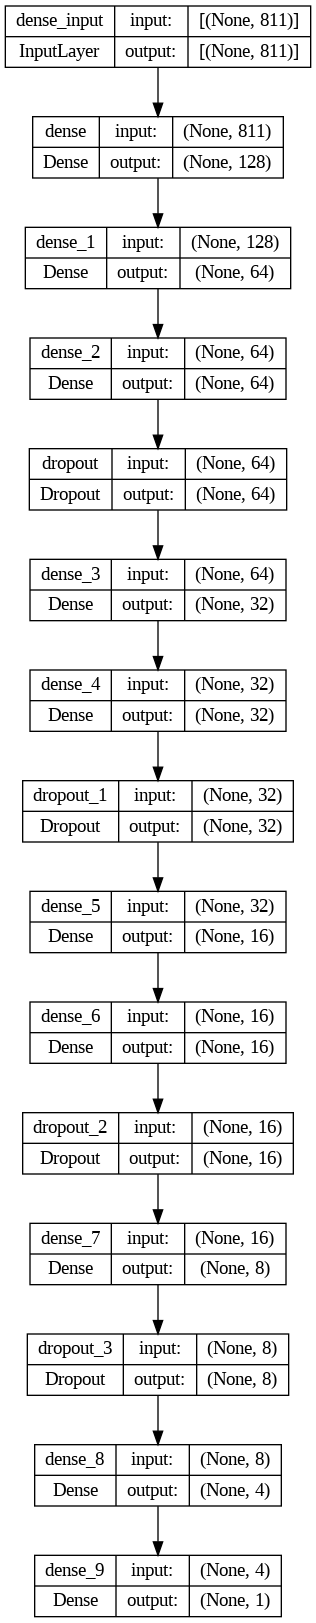

In [33]:
keras.utils.plot_model(model, to_file='png', show_shapes=True)

#**Training the model with the help of callbacks so as to avoid overfitting**

In [34]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')
from keras.callbacks import EarlyStopping
es = EarlyStopping(patience = 2, monitor = 'val_loss')
model.fit(X_train, y_train, epochs = 25, batch_size = 10, validation_data = (X_test, y_test), callbacks = [es])

Epoch 1/25
19688/19688 [==============================] - 114s 6ms/step - loss: 1.6057e-04 - val_loss: 2.8405e-04
Epoch 2/25
19688/19688 [==============================] - 107s 5ms/step - loss: 1.5994e-04 - val_loss: 2.8420e-04
Epoch 3/25
19688/19688 [==============================] - 109s 6ms/step - loss: 1.6003e-04 - val_loss: 2.8405e-04


#**Plotting the history of the model**

<Axes: >

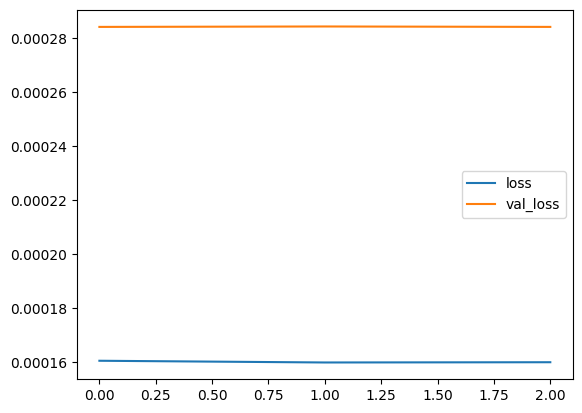

In [35]:
hist = model.history.history
h = pd.DataFrame(hist)
h.plot()

#**Model predicting the values**

In [36]:
y_predict = model.predict(X_test)
y_predict

1539/1539 [==============================] - 3s 2ms/step


array([[0.00016082],
       [0.00016082],
       [0.00016082],
       ...,
       [0.00016082],
       [0.00016082],
       [0.00016082]], dtype=float32)

#**Plot between predicted values and test values**

Text(0, 0.5, 'y_predict')

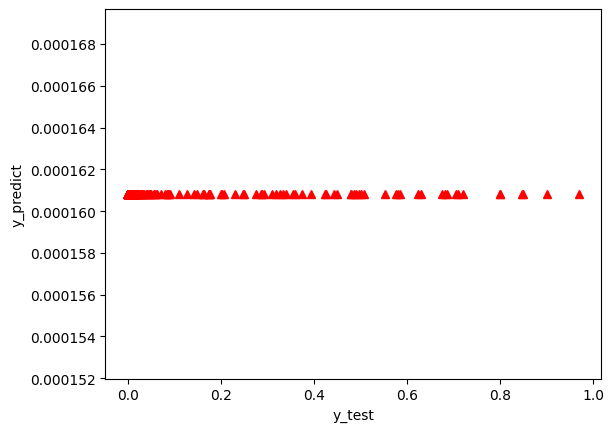

In [37]:
plt.plot(y_test,y_predict, '^', color = 'r')
plt.xlabel('y_test')
plt.ylabel('y_predict')

#**Plot between model's predictions and the true values**

Text(0, 0.5, 'true_values')

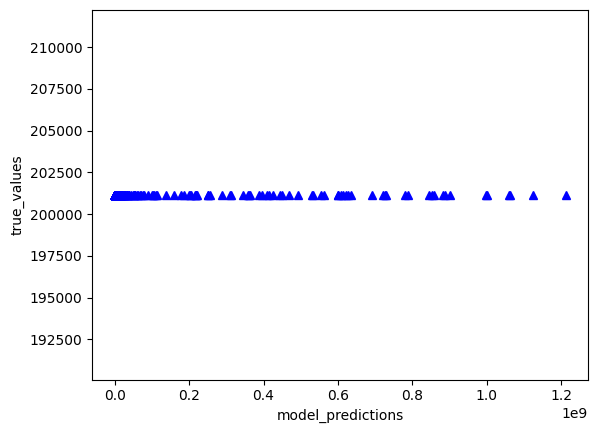

In [38]:
y_predict_original = Scaler.inverse_transform(y_predict)
y_test_original = Scaler.inverse_transform(y_test)
plt.plot(y_test_original,y_predict_original,'^',color = 'b')
plt.xlabel('model_predictions')
plt.ylabel('true_values')

#**Calculation of value of n**

In [47]:
k = X_test.shape
k
n = len(X_test)
n

49219

#**Calculation of Root Mean Squared Value**

In [40]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from math import sqrt
RMSE = float(format(np.sqrt(mean_squared_error(y_test_original,y_predict_original)), '0.3f'))
print(RMSE)

21080981.274


#**Calculation of Mean Squared Value**

In [41]:
MSE = mean_squared_error(y_test_original,y_predict_original)
print(MSE)

444407771476213.7


#**Calculation of Mean Absolute Value**

In [42]:
MAE = mean_absolute_error(y_test_original,y_predict_original)
print(MAE)

900126.1386866091


#**Calculation of R2 Score**

In [43]:
r2 = r2_score(y_test_original,y_predict_original)
print(r2)

-0.0006611469950694726
